In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ataljalyojana/Atal Jal 31 March 2021 .xlsx - Sheet1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno # Ploting missng values
import plotly.graph_objects as go

In [3]:
df=pd.read_csv('../input/ataljalyojana/Atal Jal 31 March 2021 .xlsx - Sheet1.csv')
df.head()

,Sl. No.,State,District,Block,Village,TYPE,SOURCE,Site_Name,Latitude,Longitude,...,Avg Diff,Avg Pre,Avg Post,Avg Level,Sign Diff 15,Sign Diff 16,Sign Diff 17,Sign Diff 18,Sign Diff 19,Sum Signed Diff
0,1,Gujarat,Mahesana,Jotana,Suraj,Piezometer,CGWB,Suraj,23.126944,72.193056,...,-2.82,31.07,29.67,30.30,0,-1,-1,-1,-1,-4
1,2,Gujarat,Mahesana,Jotana,Jotana,Piezometer,CGWB,Jotana Pziii,23.130556,72.376111,...,-0.58,5.08,4.51,4.79,-1,-1,-1,-1,-1,-5
2,3,Gujarat,Kachchh,Bhuj,Kera,Piezometer,CGWB,Madhapar,23.142778,69.737500,...,1.20,48.76,49.47,49.15,1,0,1,1,-1,2
3,4,Gujarat,Gandhinagar,Dehgam,Dehgam (M),Piezometer,CGWB,Dahegam I,23.170833,72.841667,...,-40.88,67.94,26.60,52.44,0,0,-1,0,-1,-2
4,5,Gujarat,Gandhinagar,Gandhinagar,Shertha,Piezometer,CGWB,Kasturinagar(IFFCO),23.190278,72.552778,...,-2.04,13.70,11.66,12.68,-1,1,-1,1,-1,-1


In [4]:
df['State']=df['State'].str.lower()

In [5]:
df['missing_value']=(df.isnull().sum()/len(df))*100

In [6]:
df.columns

Index(['Sl. No.', 'State', 'District', 'Block', 'Village', 'TYPE', 'SOURCE',
       'Site_Name', 'Latitude', 'Longitude', 'Well Depth', 'Aquifier',
       'Level Depth Ratio', 'Pre_2015', 'Pst_2015', 'Pre_2016', 'Pst_2016',
       'Pre_2017', 'Pst_2017', 'Pre_2018', 'Pst_2018', 'Pre_2019', 'Pst_2019',
       'Final Count', 'Pre Diff 19 15', 'Pst Diff 19 15', 'Diff 2015',
       'Diff 2016', 'Diff 2017', 'Diff 2018', 'Diff 2019', 'Avg Diff',
       'Avg Pre', 'Avg Post ', 'Avg Level', 'Sign Diff 15', 'Sign Diff 16',
       'Sign Diff 17', 'Sign Diff 18', 'Sign Diff 19', 'Sum Signed Diff',
       'missing_value'],
      dtype='object')

In [7]:
(df['Well Depth'].isnull().sum()/len(df['Well Depth']))*100

43.48644578313253

In [8]:
(df['Pre_2015'].isnull().sum()/len(df))*100, (df['Pst_2015'].isnull().sum()/len(df))*100

(6.8147590361445785, 5.421686746987952)

In [9]:
(df['Pre_2016'].isnull().sum()/len(df))*100, (df['Pst_2016'].isnull().sum()/len(df))*100

(2.5602409638554215, 2.9743975903614457)

In [10]:
(df['Pre_2017'].isnull().sum()/len(df))*100, (df['Pst_2017'].isnull().sum()/len(df))*100

(2.9367469879518073, 1.4683734939759037)

In [11]:
(df['Pre_2018'].isnull().sum()/len(df))*100, (df['Pst_2018'].isnull().sum()/len(df))*100

(2.447289156626506, 2.33433734939759)

In [12]:
(df['Pre_2019'].isnull().sum()/len(df))*100, (df['Pst_2019'].isnull().sum()/len(df))*100

(8.697289156626505, 10.015060240963855)

In [13]:
x=(df.isnull().sum()/len(df))*100

<AxesSubplot:>

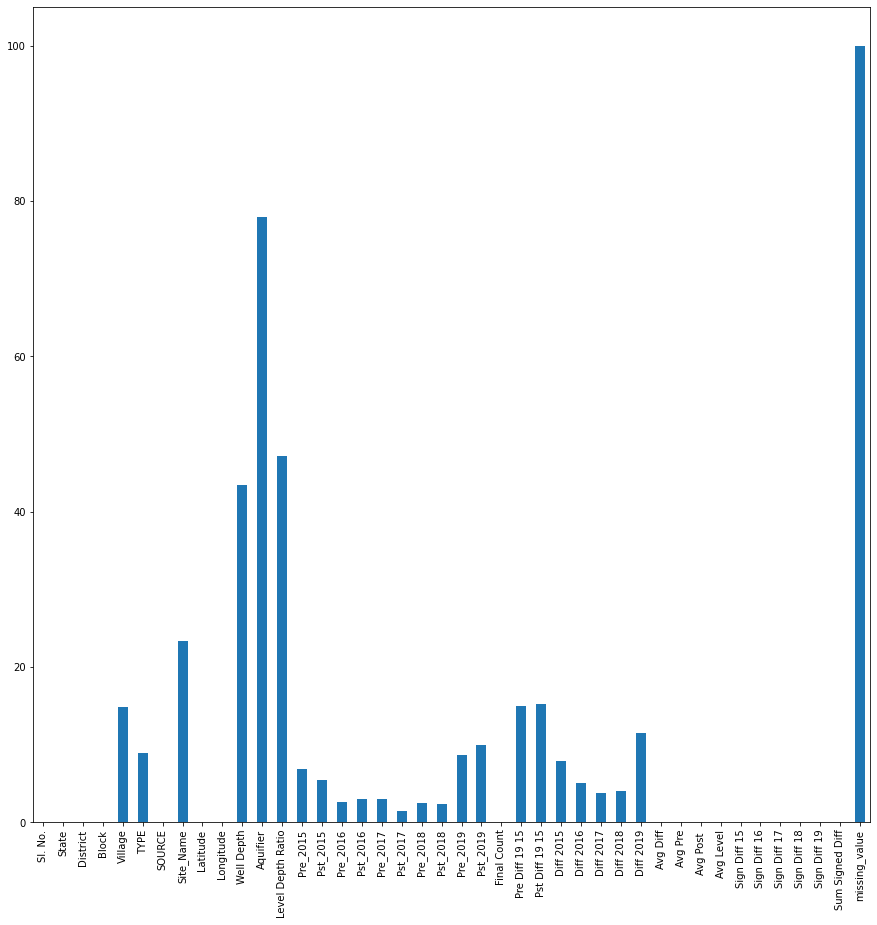

In [14]:
x.plot(kind='bar', figsize=(15,15))

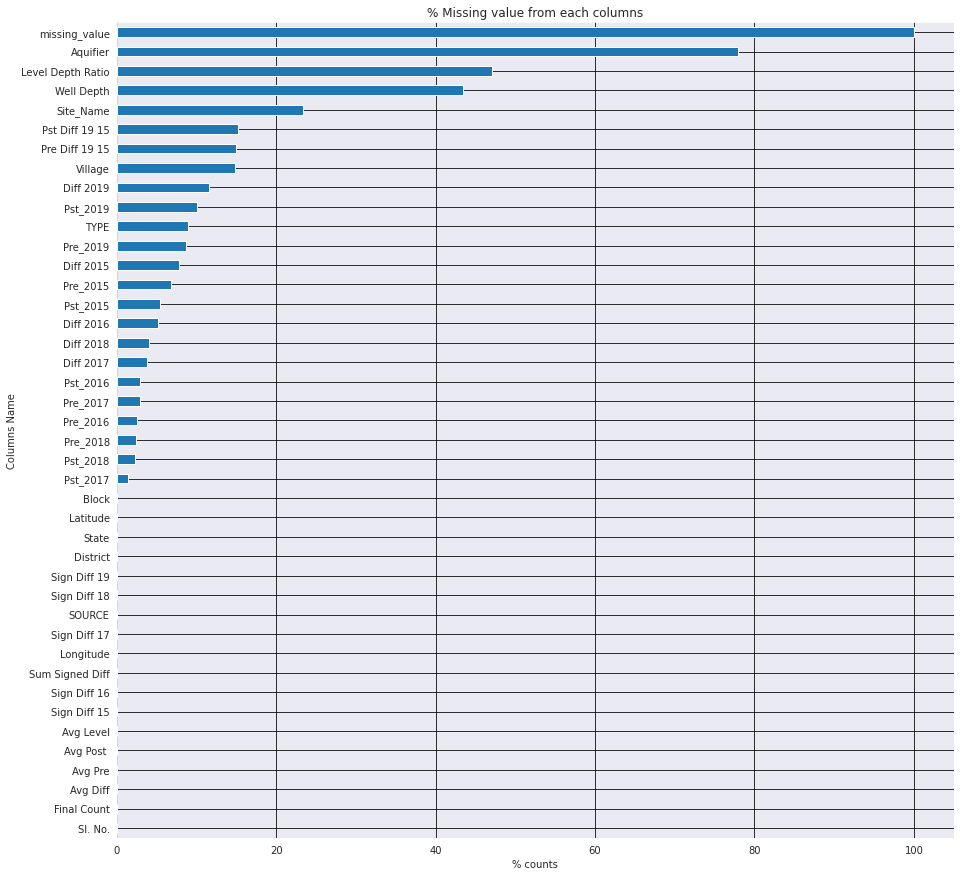

In [15]:
sns.set_style("darkgrid")
x.sort_values(ascending=True).plot(kind='barh', figsize=(15,15))
plt.grid(b=True, which='both', color='black')
plt.title("% Missing value from each columns")
plt.xlabel("% counts")
plt.ylabel("Columns Name")
plt.show()

In [16]:
import plotly.express as px

In [17]:
fig=px.bar(x=x, y=df.columns, orientation='h', title="% Missing value of the each columns")
fig.show()

In [18]:
fig=go.Figure(go.Bar(x=x,y=df.columns ,orientation='h'))
fig.show()

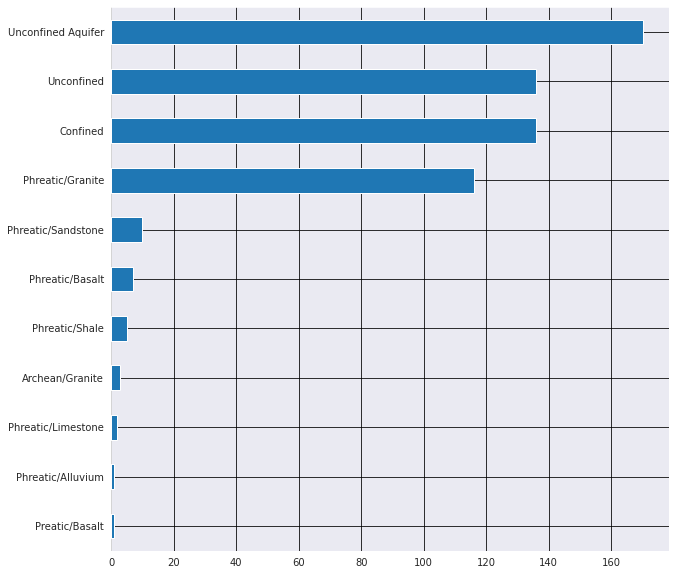

In [19]:
df['Aquifier'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both', color='black')


In [20]:
df['State'].value_counts()

maharashtra       699
haryana           614
rajasthan         387
karnataka         299
gujarat           272
uttar pradesh     198
madhya pradesh    187
Name: State, dtype: int64

<AxesSubplot:ylabel='State,Aquifier'>

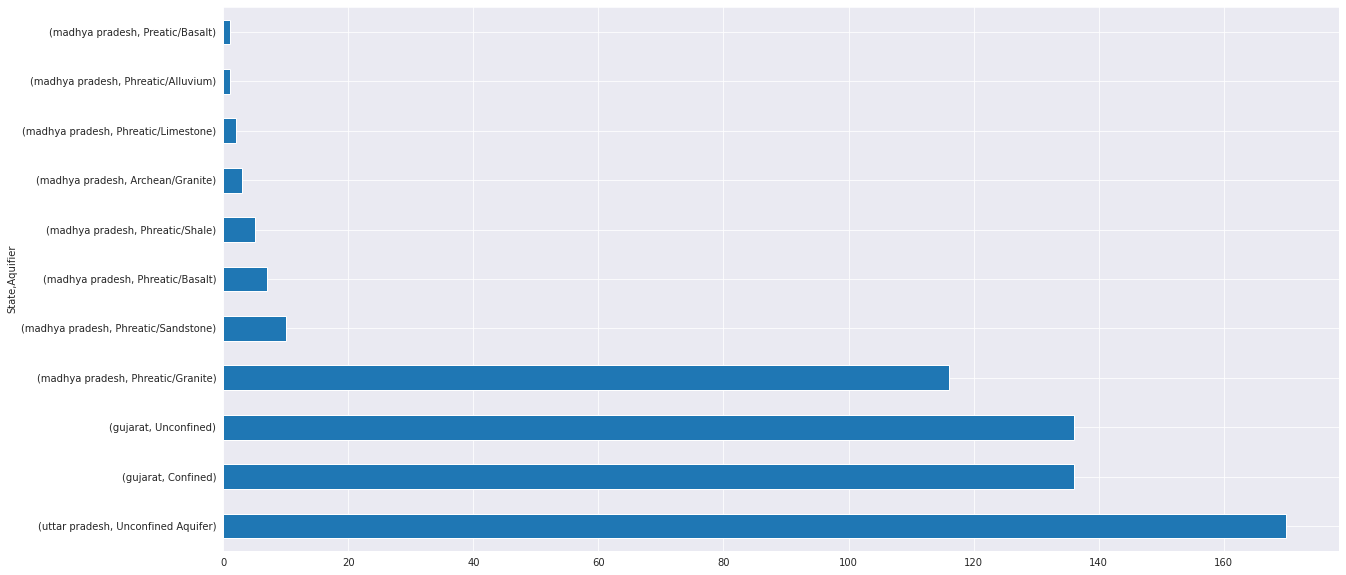

In [21]:
df[['State', 'Aquifier']].value_counts().plot( kind='barh',figsize=(20,10))

<AxesSubplot:ylabel='None'>

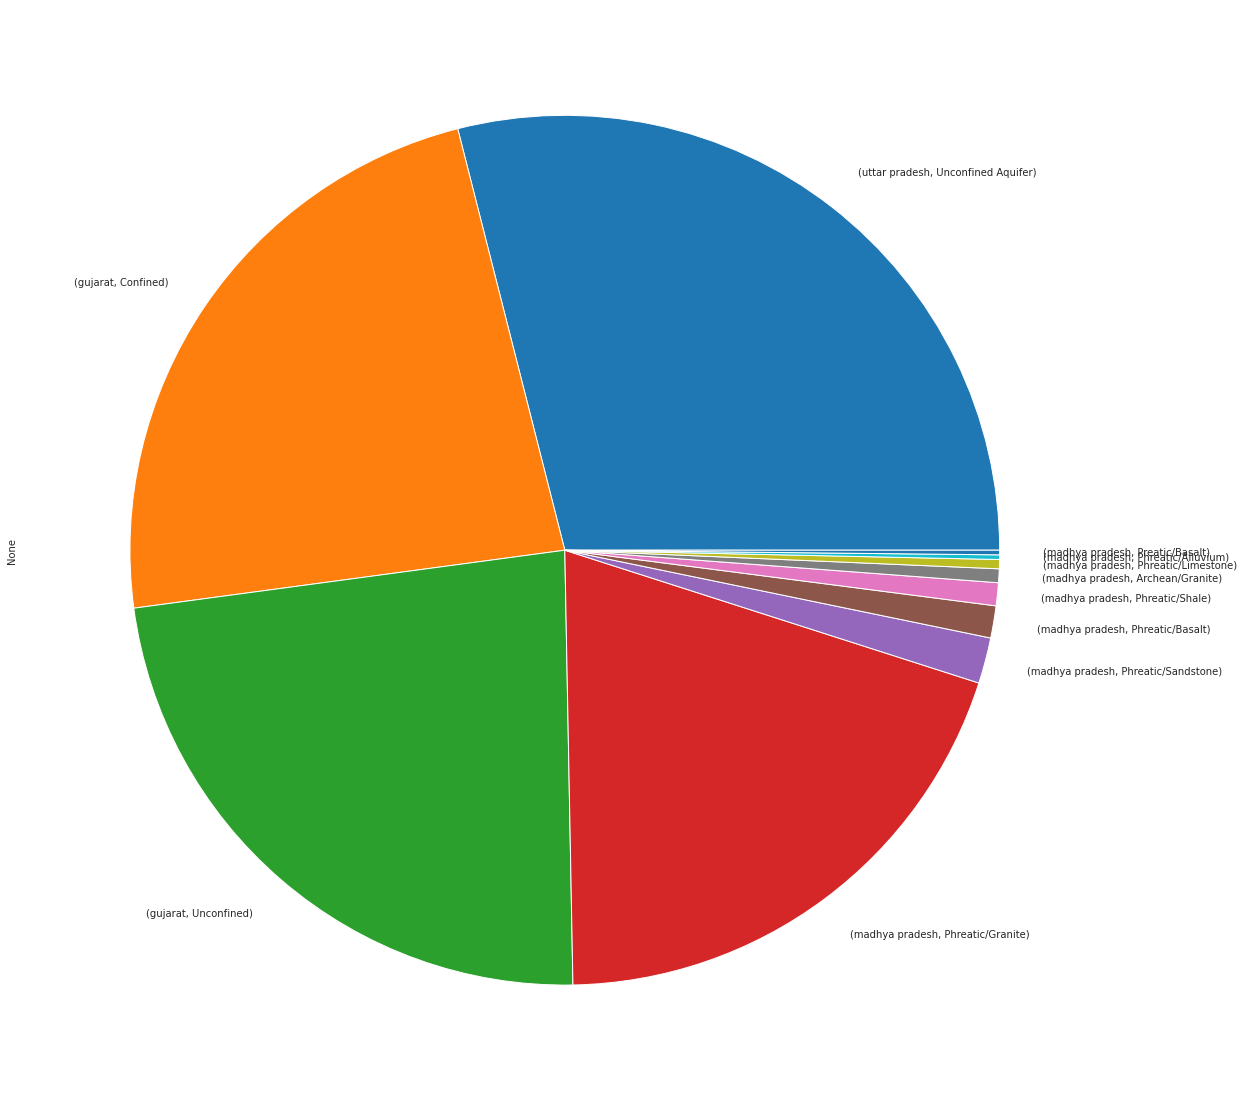

In [22]:
df[['State', 'Aquifier']].value_counts().plot( kind='pie',figsize=(20,20))

In [23]:
df['Well Depth']=df['Well Depth'].replace(np.nan, 0)


In [24]:
from numpy import array
from matplotlib import cm
from matplotlib.dates import date2num
from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

Text(0.5, 1.0, 'Map of India with Longitute and Latitude ')

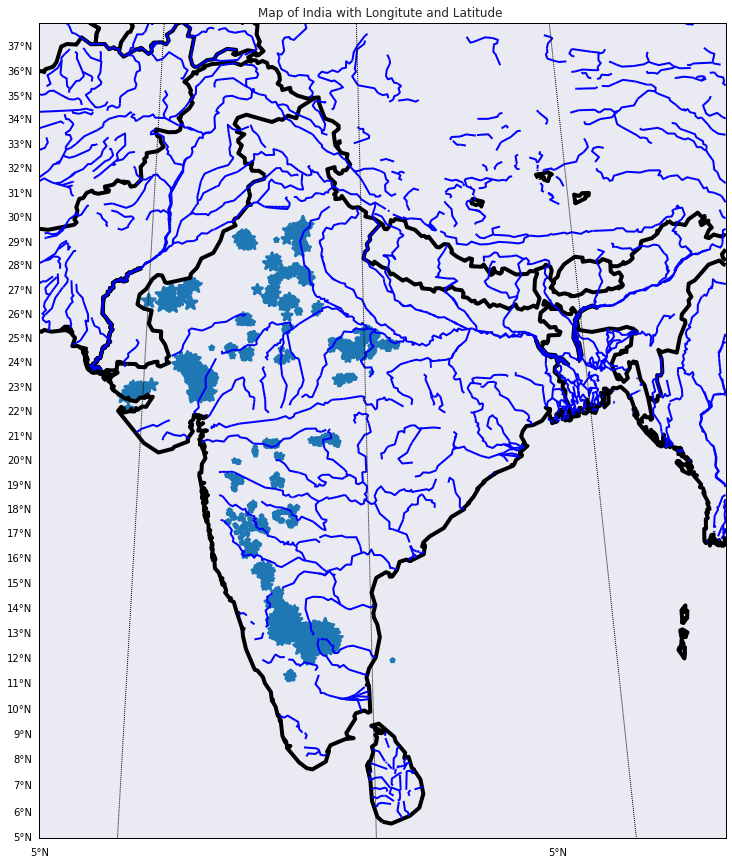

In [25]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='#0000ff')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()



lg=array(df['Longitude'])
lt=array(df['Latitude'])
pt=array(df['Well Depth'])

x, y = map(lg, lt)
well_depth = df['Well Depth'].apply(lambda x: int(x))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of India with Longitute and Latitude ")

AttributeError: there are no boundary datasets associated with this Basemap instance

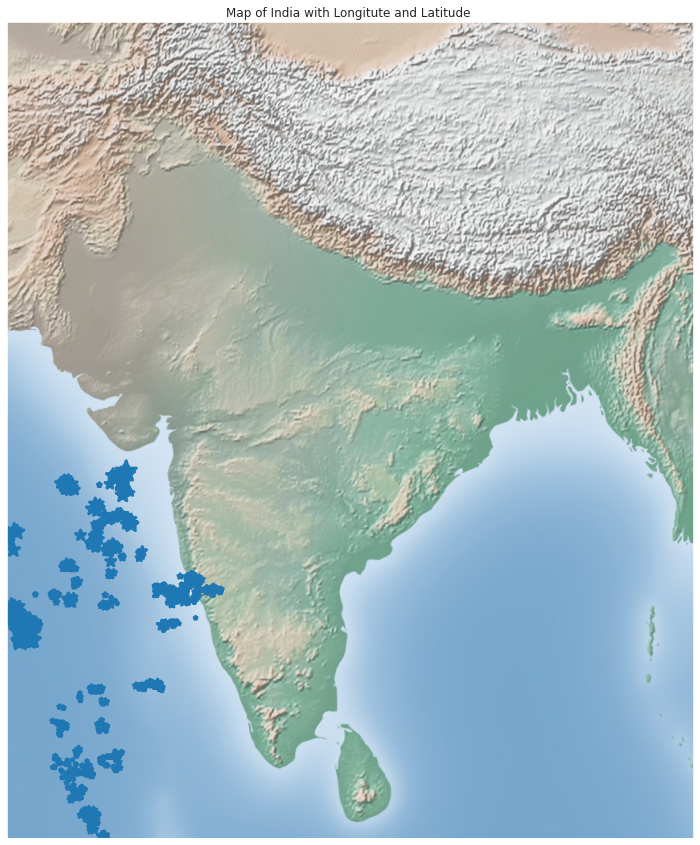

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
plt.subplots(figsize=(20, 15))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77.)
#m.drawmapboundary()
#m.drawcoastlines()

lg=array(df['Longitude'])
lt=array(df['Latitude'])
pt=array(df['Well Depth'])

x, y = map(lg, lt)
well_depth = df['Well Depth'].apply(lambda x: int(x))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of India with Longitute and Latitude ")
m.bluemarble()
m.shadedrelief()
#m.drawcoastlines()
#m.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)

plt.show()

Text(0.5, 1.0, 'Map of India with Longitute and Latitude ')

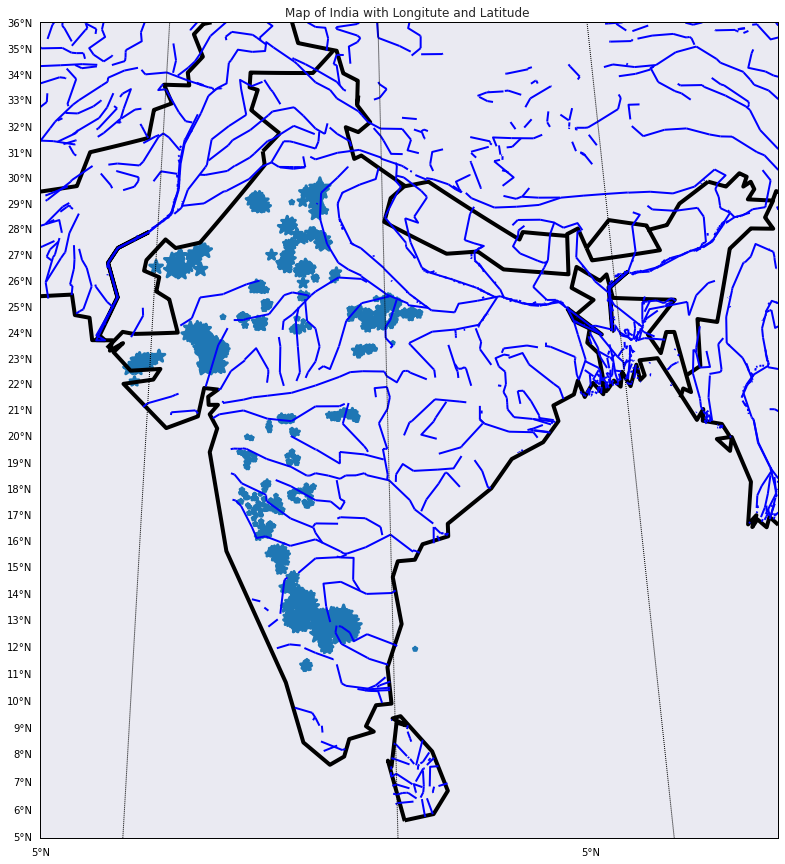

In [32]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=35,lat_0=28,lon_0=77)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='#0000ff')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()



lg=array(df['Longitude'])
lt=array(df['Latitude'])
pt=array(df['Well Depth'])

x, y = map(lg, lt)
well_depth = df['Well Depth'].apply(lambda x: int(x))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of India with Longitute and Latitude ")

# Gujarat

In [28]:
df_guj=df[df['State']=='gujarat']

Text(0.5, 1.0, 'Map of Gujarat with Longitute and Latitude ')

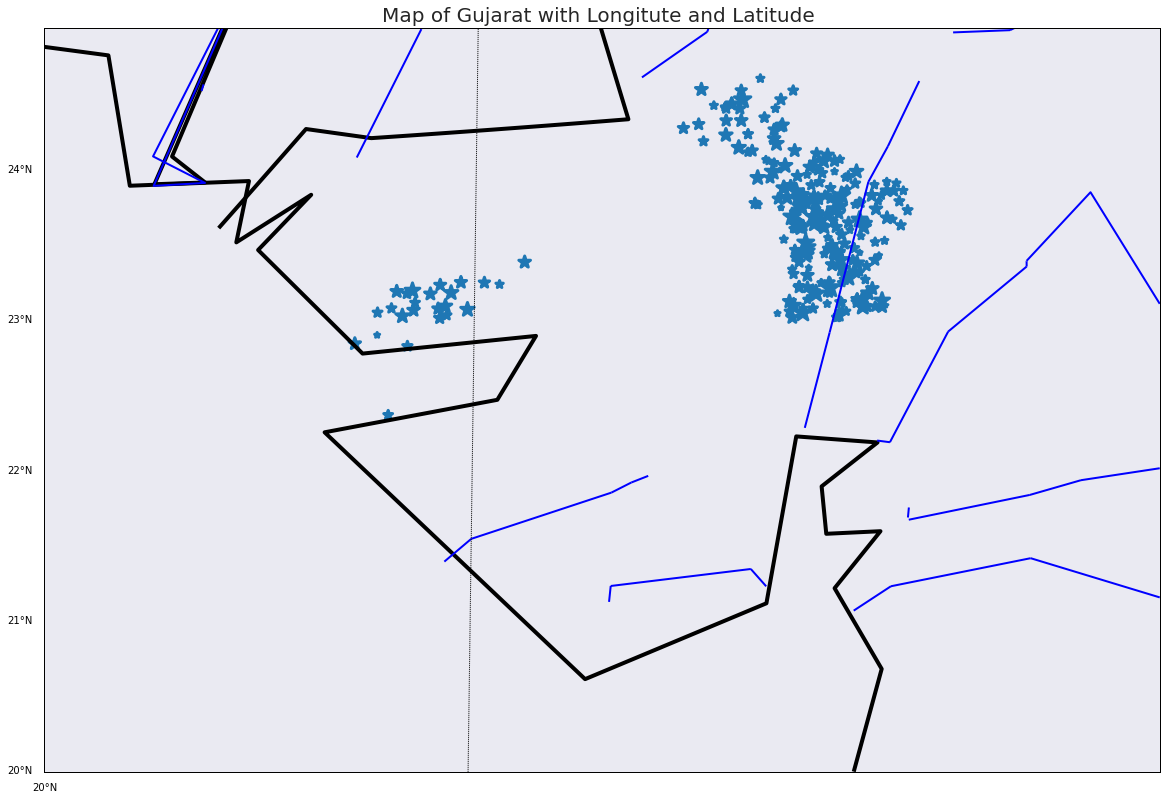

In [35]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=67,llcrnrlat=20,urcrnrlon=75,urcrnrlat=25,lat_0=23,lon_0=72)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='#0000ff')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()



lg=array(df_guj['Longitude'])
lt=array(df_guj['Latitude'])
pt=array(df_guj['Well Depth'])

x, y = map(lg, lt)
well_depth = df_guj['Well Depth'].apply(lambda x: int(x))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of Gujarat with Longitute and Latitude ", fontsize=20)

# Maharastra

In [38]:
df['State'].value_counts()

maharashtra       699
haryana           614
rajasthan         387
karnataka         299
gujarat           272
uttar pradesh     198
madhya pradesh    187
Name: State, dtype: int64

In [39]:
df_maha=df[df['State']=='maharashtra']

Text(0.5, 1.0, 'Map of Maharastra with Longitute and Latitude ')

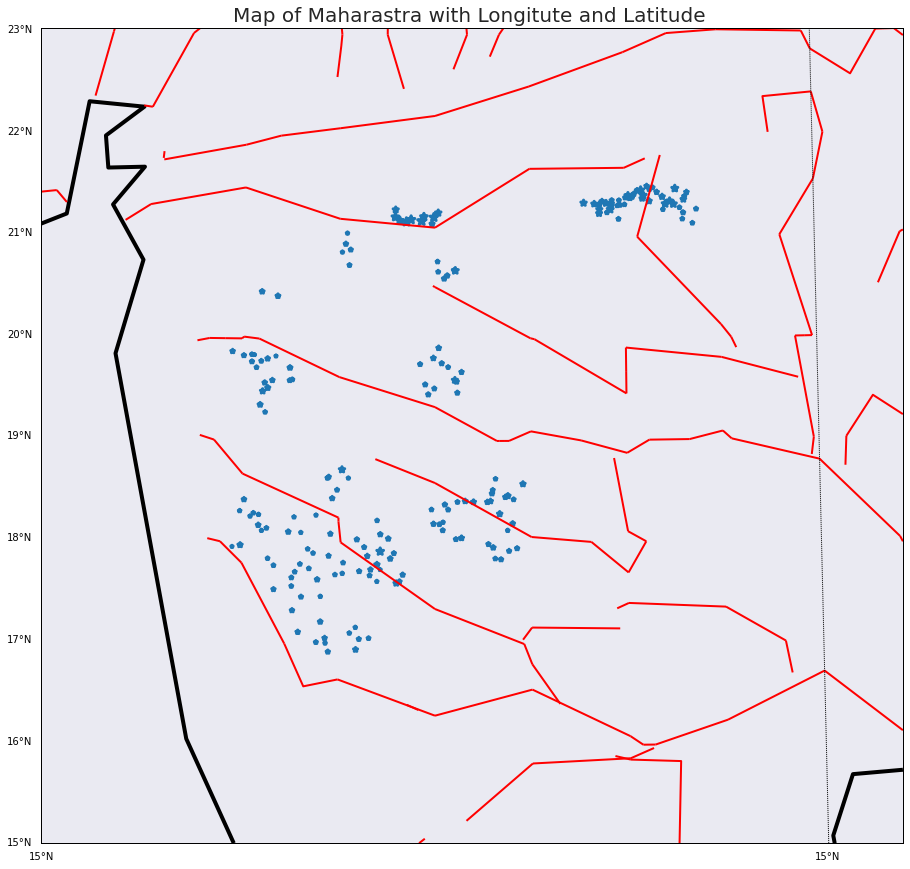

In [40]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=72,llcrnrlat=15,urcrnrlon=81,urcrnrlat=23,lat_0=20,lon_0=76)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='red')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()



lg=array(df_maha['Longitude'])
lt=array(df_maha['Latitude'])
pt=array(df_maha['Well Depth'])

x, y = map(lg, lt)
well_depth = df_maha['Well Depth'].apply(lambda x: int(x))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of Maharastra with Longitute and Latitude ", fontsize=20)

# Rajasthan

In [42]:
df_raj=df[df['State']=='rajasthan']

Text(0.5, 1.0, 'Map of Rajasthan with Longitute and Latitude ')

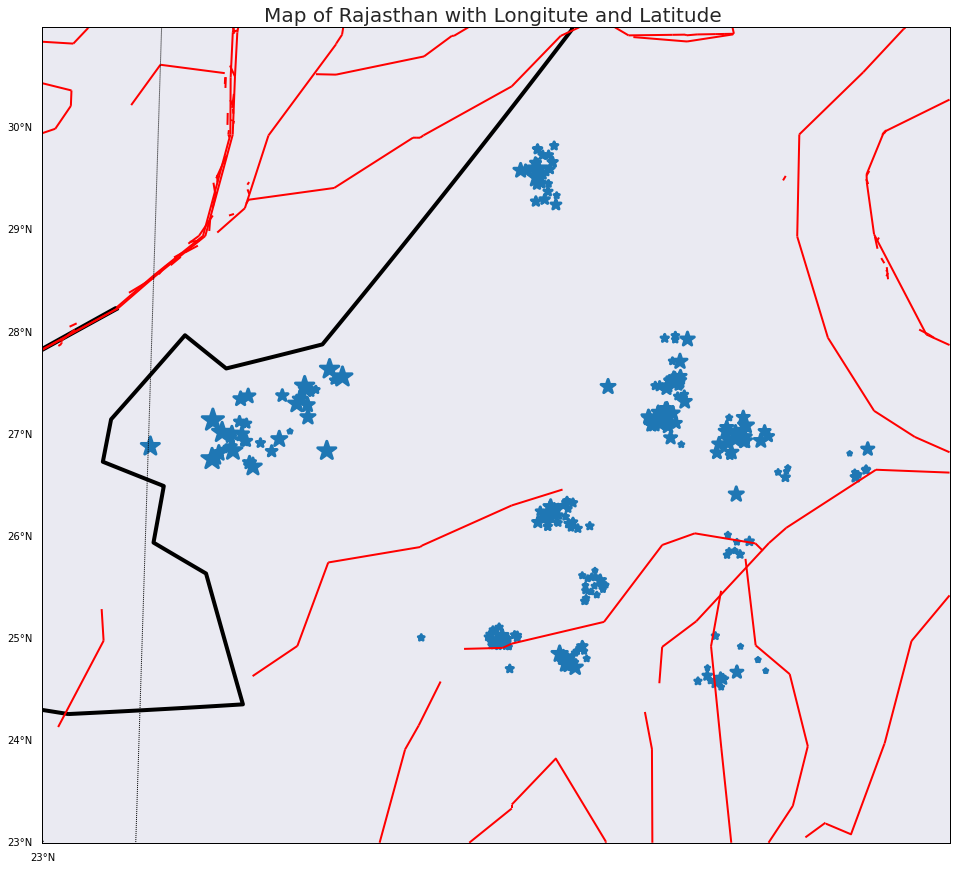

In [51]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=69,llcrnrlat=23,urcrnrlon=79,urcrnrlat=31,lat_0=27,lon_0=74)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='red')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()



lg=array(df_raj['Longitude'])
lt=array(df_raj['Latitude'])
pt=array(df_raj['Well Depth'])

x, y = map(lg, lt)
well_depth = df_raj['Well Depth'].apply(lambda x: int(x/0.5))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of Rajasthan with Longitute and Latitude ", fontsize=20)

# Haryana

In [46]:
df_har=df[df['State']=='haryana']

Text(0.5, 1.0, 'Map of Haryana with Longitute and Latitude ')

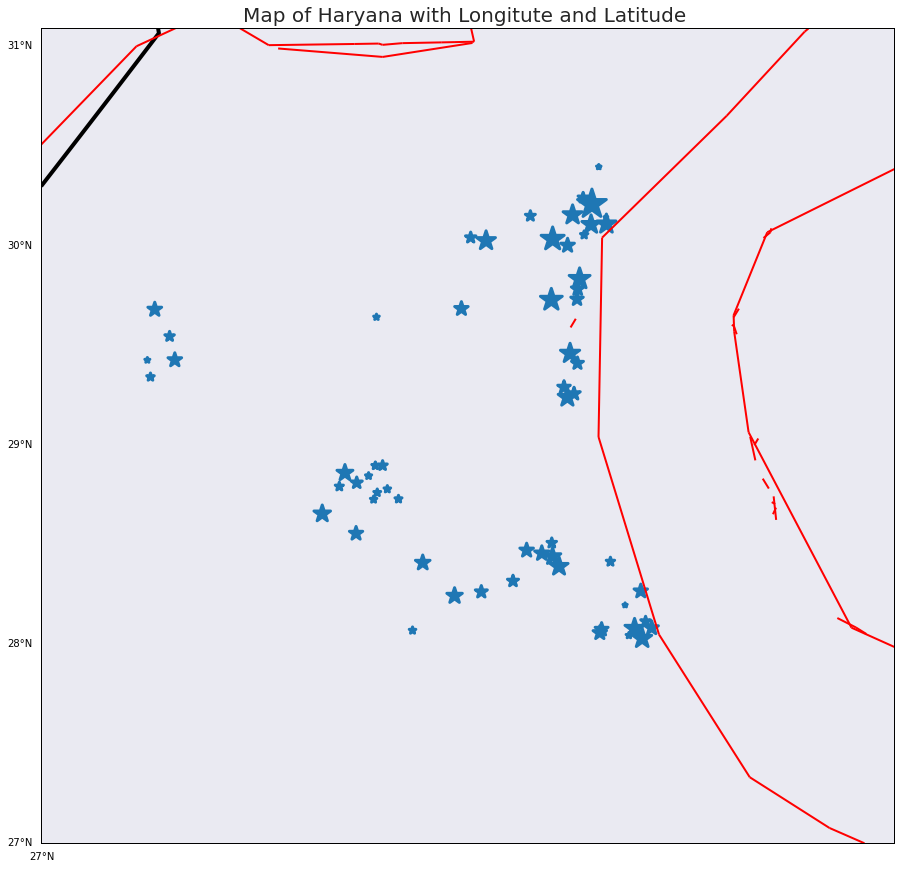

In [55]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=74,llcrnrlat=27,urcrnrlon=79,urcrnrlat=31,lat_0=30,lon_0=74)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
#map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='red')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()


lg=array(df_har['Longitude'])
lt=array(df_har['Latitude'])
pt=array(df_har['Well Depth'])

x, y = map(lg, lt)
well_depth = df_har['Well Depth'].apply(lambda x: int(x/0.5))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of Haryana with Longitute and Latitude ", fontsize=20)

# uttar pradesh

In [53]:
df_up=df[df['State']=='uttar pradesh']

Text(0.5, 1.0, 'Map of U.P with Longitute and Latitude ')

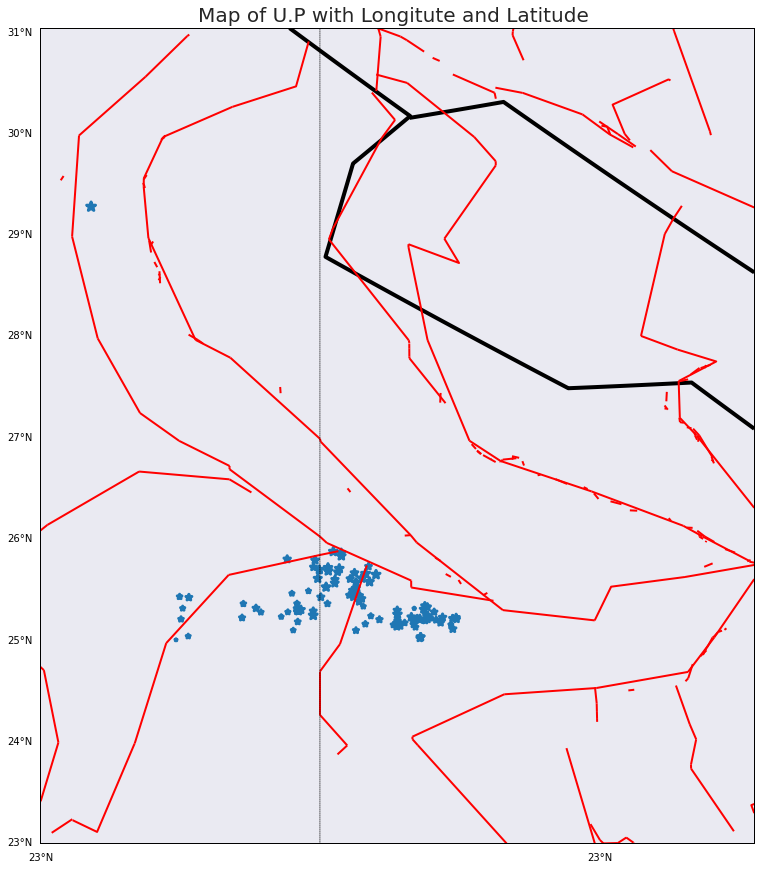

In [56]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=77,llcrnrlat=23,urcrnrlon=85,urcrnrlat=31,lat_0=27.4,lon_0=80)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
#map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='red')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()


lg=array(df_up['Longitude'])
lt=array(df_up['Latitude'])
pt=array(df_up['Well Depth'])

x, y = map(lg, lt)
well_depth = df_up['Well Depth'].apply(lambda x: int(x/0.5))
plt.scatter(x, y,s=well_depth,marker='*', cmap=cm.Dark2, linewidths=3)
plt.title("Map of U.P with Longitute and Latitude ", fontsize=20)

# M.P

In [57]:
df_mp=df[df['State']=='madhya pradesh']

Text(0.5, 1.0, 'Map of M.P with Longitute and Latitude ')

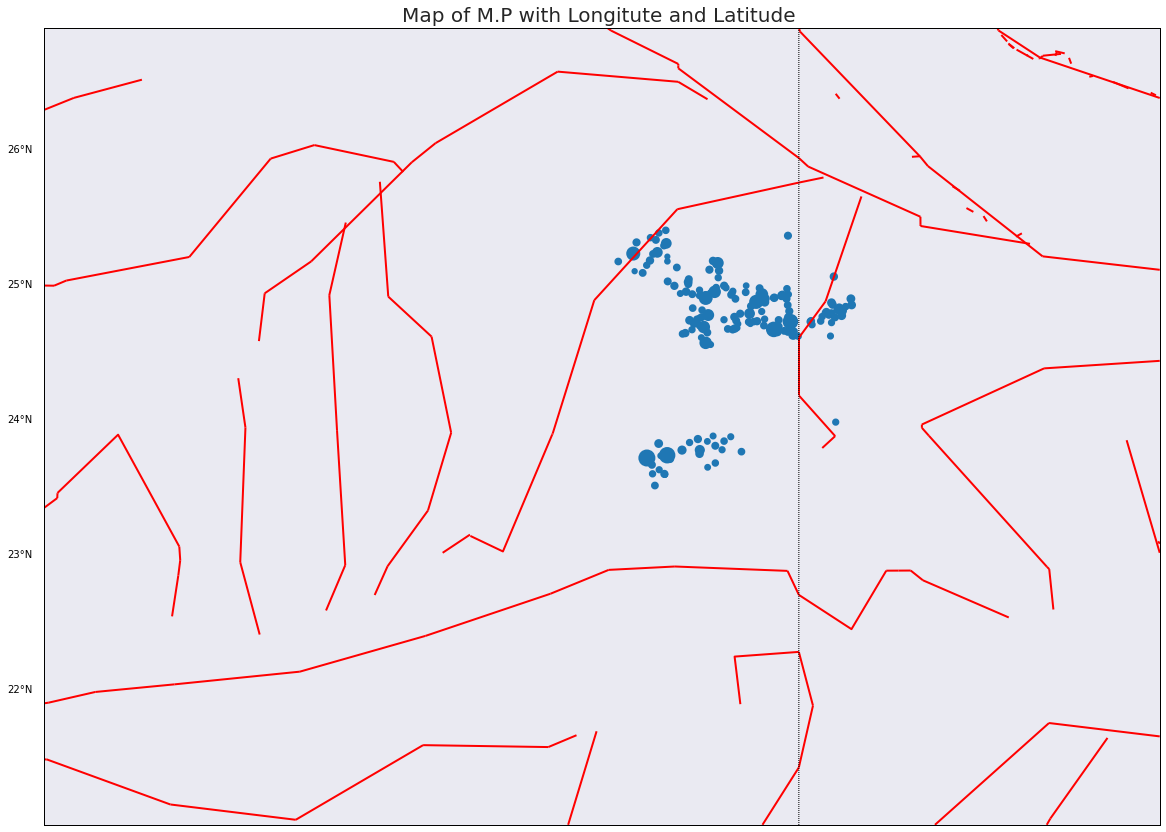

In [59]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=74,llcrnrlat=21,urcrnrlon=83,urcrnrlat=27,lat_0=23.3,lon_0=80)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
#map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='red')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()


lg=array(df_mp['Longitude'])
lt=array(df_mp['Latitude'])
pt=array(df_mp['Well Depth'])

x, y = map(lg, lt)
well_depth = df_mp['Well Depth'].apply(lambda x: int(x/0.5))
plt.scatter(x, y,s=well_depth,marker='o', cmap=cm.Dark2, linewidths=3)
plt.title("Map of M.P with Longitute and Latitude ", fontsize=20)

# Karnataka

In [60]:
df_kar=df[df['State']=='karnataka']

Text(0.5, 1.0, 'Map of Karnataka with Longitute and Latitude ')

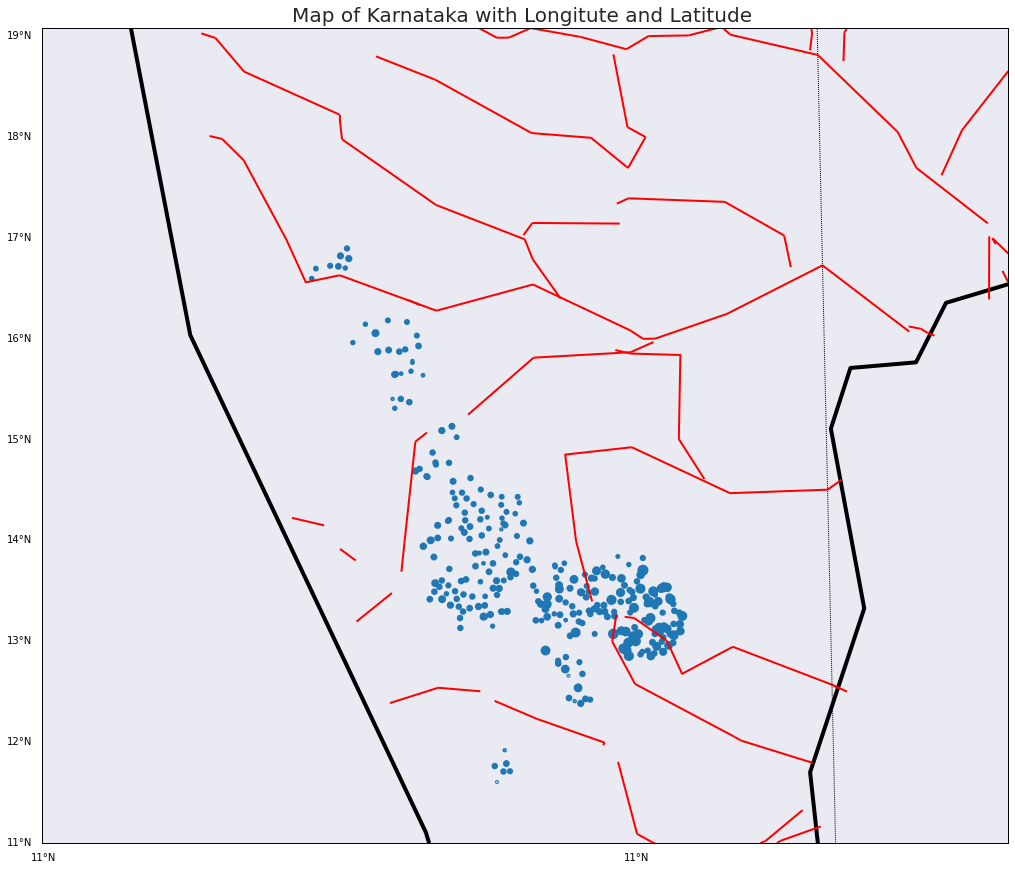

In [64]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=12,height=9,projection='lcc',resolution='c',
                    llcrnrlon=72,llcrnrlat=11,urcrnrlon=82,urcrnrlat=19,lat_0=15,lon_0=75)
map.drawmapboundary(color='k')
map.drawcountries(linewidth=4)
map.drawcoastlines(linewidth=4, linestyle='solid', color='k', ax=None, zorder=None)
map.drawstates(linewidth=4,antialiased=1,color='0.5')
#map.fillcontinents()
map.drawrivers(linewidth=2, linestyle='solid', color='red')
map.drawlsmask(land_color='0.8', ocean_color='#7777ff', lakes=True)
map.etopo()
map.warpimage()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-90, 100, 1), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )
map.shadedrelief()


lg=array(df_kar['Longitude'])
lt=array(df_kar['Latitude'])
pt=array(df_kar['Well Depth'])

x, y = map(lg, lt)
well_depth = df_kar['Well Depth'].apply(lambda x: int(x/5))
plt.scatter(x, y,s=well_depth,marker='o', cmap=cm.Dark2, linewidths=3)
plt.title("Map of Karnataka with Longitute and Latitude ", fontsize=20)